# Tarea PySpark

### Objetivo:
 Analizar la eficiencia de los jugadores en términos generales y por posición, así como determinar la contribución al equipo por jugador tomando en cuenta los datos obtenidos

Usarás la base de datos del archivo 'fusbol.csv' para obtener tus datos. Checa la estructura del archivo para ver si es necesario limpiar la informacion, ver su estructura y así sea más fácil completar la tarea. Besos.

### Ejercicio 1:
Carga la base de datos en un DataFrame de Pyspark (con 2 nucleos). Valida los rangos de los valores donde sea aplicable, así como su corrección (en caso de ser necesaria). 
Después, utilizando las variables más relevantes como 'Ast/90', 'PassCmp%', etc., concluye qué ligas tienen los mejores jugadores por posición. Es decir, si los mejores jugadores defensas son de la liga francesa, inglesa, etc., por ejemplo.
Como cada persona tiene una definición de "mejor", utiliza las siguientes metricas por posición:
- Delanteros: npG+A/90 y npxG+xA/90
- Medios: KeyPass/90 y PassCmp%
- Defensas: PressSucc% y Interceptions/90

Con los resultados obtenidos, grafica por posición para que tu conclusión tenga un respaldo visual también.

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [2]:
spark = SparkSession.builder.appName('tarea footbal') \
    .config('spark.master', 'local[2]')\
    .config('spark.executor.memory', '1g')\
    .config("spark.sql.shuffle.partitions", 10)\
    .config('spark.driver.memory','1g')\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/13 17:35:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/05/13 17:35:37 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
spark

In [4]:
file_path = "file:/Users/luciavarelag/itam/fuentes_datos/Pyspark/fusbol.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)
df.show()

24/05/13 17:36:04 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------------------+-------+---+---------------+------------------+----+------+---+------+----+----+------+------+--------+-----+-------+----------+--------+-------+-----+--------+-------+-----------+--------+---------+-------+----------+----------+--------+--------------+--------------+-----------+-----------+---------+---------+---------+-------+----------+----------+--------+----------+----------------+--------------+---------------+-----------+--------------+--------------+------------+--------+-----------------+-----------+----------+-------------+----------+-----------+-----------+------------+-----------+------------+----------------+--------------+------------+------------+------------+------+--------------+--------------+----------+--------+----------+---------+------+--------------+--------------+----------+--------+----------+---------+---------+-------+-------------+-------------+-------------+------------+--------------+---------+-----------+-----------+------------+-----

In [5]:
df.printSchema()

root
 |-- Player: string (nullable = true)
 |-- Nation: string (nullable = true)
 |-- Pos: string (nullable = true)
 |-- Squad: string (nullable = true)
 |-- Comp: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Born: double (nullable = true)
 |-- MP: integer (nullable = true)
 |-- Starts: integer (nullable = true)
 |-- Min: integer (nullable = true)
 |-- 90s: double (nullable = true)
 |-- Ast/90: double (nullable = true)
 |-- npG/90: double (nullable = true)
 |-- npG+A/90: double (nullable = true)
 |-- xA/90: double (nullable = true)
 |-- npxG/90: double (nullable = true)
 |-- npxG+xA/90: double (nullable = true)
 |-- Shots/90: double (nullable = true)
 |-- SoTs/90: double (nullable = true)
 |-- SoT%: double (nullable = true)
 |-- Gls/Shot: double (nullable = true)
 |-- Gls/SoT: double (nullable = true)
 |-- AvgShotDist: double (nullable = true)
 |-- FKSht/90: double (nullable = true)
 |-- npxG/Shot: double (nullable = true)
 |-- np:G-xG: double (nullable = true)
 |--

In [6]:
# Quitamos los NA 
df= df.dropna()
df.count()

1839

In [7]:
from pyspark.sql.functions import avg

In [8]:
# Filtramos la información para las diferentes posiciones.
delanteros = df.filter(df.Pos == 'FW')
liga_delanteros = delanteros.groupBy('Comp').agg(
    avg('npG+A/90').alias('npG+A/90'),
    avg('npxG+xA/90').alias('npxG+xA/90')
).orderBy('npG+A/90', ascending=False)

In [9]:
medios = df.filter(df.Pos == 'MF')
liga_medios = medios.groupBy('Comp').agg(
    avg('KeyPass/90').alias('KeyPass/90'),
    avg('PassCmp%').alias('PassCmp%')
).orderBy('KeyPass/90', ascending=False)

In [10]:
defensas = df.filter(df.Pos == 'DF')
liga_defensas = defensas.groupBy('Comp').agg(
    avg('PressSucc%').alias('PressSucc%'),
    avg('Interceptions/90').alias('Interceptions/90')
).orderBy('PressSucc%', ascending=False)

In [11]:
# Contar cuántos jugadores hay por posición
positions_count = df.groupBy("Pos").count()

/var/folders/7r/6s1q_b2x7rldv60cty2jvx440000gn/T/ipykernel_7021/439219213.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(comp_delanteros, rotation=90)  # Rotar nombres de ejes x
/var/folders/7r/6s1q_b2x7rldv60cty2jvx440000gn/T/ipykernel_7021/439219213.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(comp_medios, rotation=90)  # Rotar nombres de ejes x
/var/folders/7r/6s1q_b2x7rldv60cty2jvx440000gn/T/ipykernel_7021/439219213.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_xticklabels(comp_defensas, rotation=90)  # Rotar nombres de ejes x


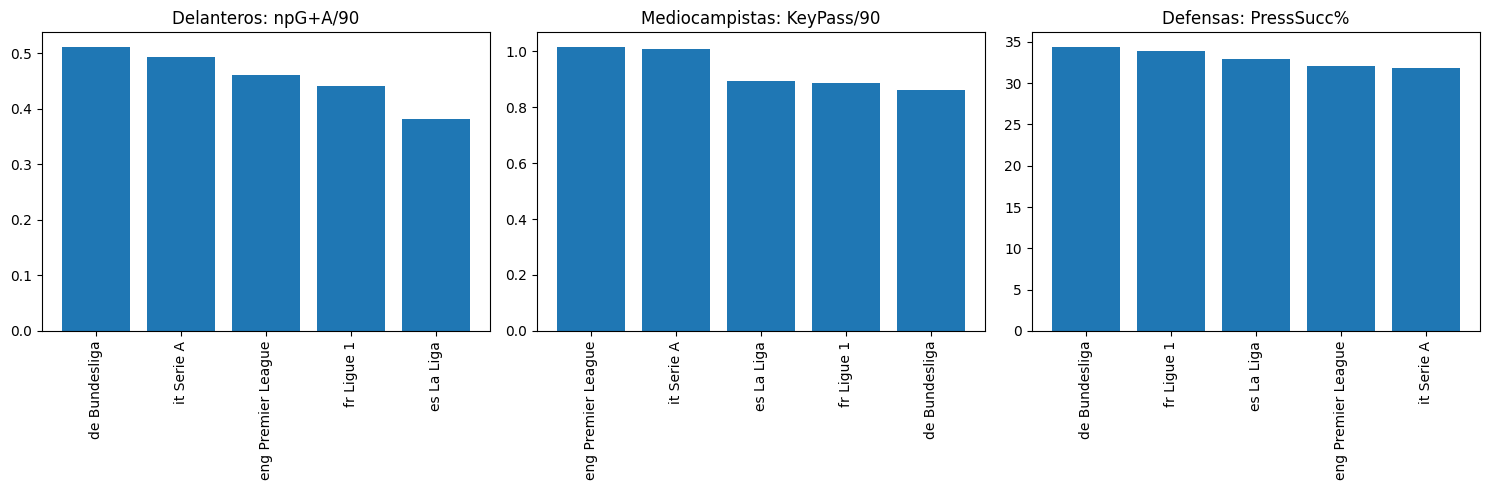

In [12]:
import matplotlib.pyplot as plt

# Extraer los datos como listas
comp_delanteros = [row['Comp'] for row in liga_delanteros.select('Comp').collect()]
npG_A_delanteros = [row['npG+A/90'] for row in liga_delanteros.select('npG+A/90').collect()]

comp_medios = [row['Comp'] for row in liga_medios.select('Comp').collect()]
KeyPass_medios = [row['KeyPass/90'] for row in liga_medios.select('KeyPass/90').collect()]

comp_defensas = [row['Comp'] for row in liga_defensas.select('Comp').collect()]
PressSucc_defensas = [row['PressSucc%'] for row in liga_defensas.select('PressSucc%').collect()]

# Subgráficos
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Delanteros
ax[0].bar(comp_delanteros, npG_A_delanteros)
ax[0].set_title('Delanteros: npG+A/90')
ax[0].set_xticklabels(comp_delanteros, rotation=90)  # Rotar nombres de ejes x

# Medios
ax[1].bar(comp_medios, KeyPass_medios)
ax[1].set_title('Mediocampistas: KeyPass/90')
ax[1].set_xticklabels(comp_medios, rotation=90)  # Rotar nombres de ejes x

# Defensas
ax[2].bar(comp_defensas, PressSucc_defensas)
ax[2].set_title('Defensas: PressSucc%')
ax[2].set_xticklabels(comp_defensas, rotation=90)  # Rotar nombres de ejes x

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

### Ejercicio 2:

Ahora hagamos algo un poco más interesante. Escoge algún jugador de todos los disponibles y toma 5 metricas, las que quieras. Debes concluir en qué percentil se encuentra el jugador en esas métricas que escogiste. Obviamente, vas a comparar sus valores con todos los demás con los que comparte posición y liga, para no tener un sesgo y que la información no pierda robustez. Por último, genera un DataFrame de Pyspark con todos los datos solicitados. Muestra el DataFrame y conviertelo a otro de tipo pandas. Muestra los dos.

In [13]:
jugador_seleccionado = 'Lionel Messi'
metricas = ['npG+A/90', 'PassCmp%', 'PressSucc%', 'Interceptions/90', 'KeyPass/90']

In [14]:
datos_jugador = df.filter((col('Player') == jugador_seleccionado))

In [15]:
# Obtener la posición y liga del jugador seleccionado
posicion_jugador = datos_jugador.select('Pos').first()[0]
liga_jugador = datos_jugador.select('Comp').first()[0]

In [16]:
# Filtrar los datos
datos_comparativos = df.filter((col('Pos') == posicion_jugador) & (col('Comp') == liga_jugador) & (col('Player') != jugador_seleccionado))

In [17]:
# Percentiles para las métricas seleccionadas
percentiles = {}
for metrica in metricas:
    valor_jugador = datos_jugador.select(metrica).first()[0]
    percentil = datos_comparativos.approxQuantile(metrica, [0.0, 0.25, 0.5, 0.75, 1.0], 0.01)
    percentil_jugador = sum(1 for valor in percentil if valor <= valor_jugador) / len(percentil)
    percentiles[metrica] = percentil_jugador

In [18]:
# DataFrame de PySpark 
datos_resultantes = spark.createDataFrame([(jugador_seleccionado, posicion_jugador, liga_jugador, percentiles[metrica]) for metrica in metricas], ['Player', 'Position', 'League', 'Percentile'])

In [19]:
print("DataFrame de PySpark:")
datos_resultantes.show()

DataFrame de PySpark:


+------------+--------+----------+----------+
|      Player|Position|    League|Percentile|
+------------+--------+----------+----------+
|Lionel Messi|   FW,MF|es La Liga|       1.0|
|Lionel Messi|   FW,MF|es La Liga|       0.8|
|Lionel Messi|   FW,MF|es La Liga|       0.8|
|Lionel Messi|   FW,MF|es La Liga|       0.4|
|Lionel Messi|   FW,MF|es La Liga|       1.0|
+------------+--------+----------+----------+



In [20]:
# Convertir el DataFrame de PySpark a un DataFrame de Pandas
datos_resultantes_pandas = datos_resultantes.toPandas()

In [21]:
print("DataFrame de Pandas:")
print(datos_resultantes_pandas)

DataFrame de Pandas:
         Player Position      League  Percentile
0  Lionel Messi    FW,MF  es La Liga         1.0
1  Lionel Messi    FW,MF  es La Liga         0.8
2  Lionel Messi    FW,MF  es La Liga         0.8
3  Lionel Messi    FW,MF  es La Liga         0.4
4  Lionel Messi    FW,MF  es La Liga         1.0
